#### Implementing a Sequential Model on the MNIST Dataset

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np

In [3]:
np.__version__

'1.24.0'

In [4]:
tf.__version__

'2.10.0'

In [5]:
keras.__version__

'2.10.0'

In [6]:
# load mnist
mnist = keras.datasets.mnist

In [48]:
# create training and testing data
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [8]:
X_train_full.shape

(60000, 28, 28)

In [49]:
# create a validation set 
X_val, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

y_val, y_train = y_train_full[:5000], y_train_full[5000:]

In [10]:
y_train[0]

7

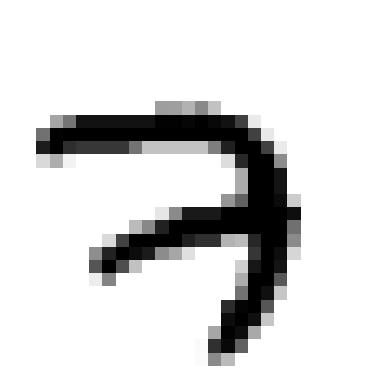

In [11]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [12]:
np.__version__

'1.24.0'

### First Sequential Model

In [55]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(150, activation = 'relu'))
model.add(keras.layers.Dense(150, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [56]:
# compile - use sparse categorical because they are not one hot encoded
model.compile(optimizer = keras.optimizers.SGD(learning_rate = 1e-2), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [61]:
history = model.fit(X_train, y_train, epochs = 10, 
                    validation_data = (X_val, y_val))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0140 - accuracy: 0.9980 - val_loss: 0.0683 - val_accuracy: 0.9804
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0132 - accuracy: 0.9982 - val_loss: 0.0685 - val_accuracy: 0.9810
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0127 - accuracy: 0.9982 - val_loss: 0.0673 - val_accuracy: 0.9806
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0123 - accuracy: 0.9985 - val_loss: 0.0698 - val_accuracy: 0.9804
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0117 - accuracy: 0.9986 - val_loss: 0.0683 - val_accuracy: 0.9808
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0112 - accuracy: 0.9987 - val_loss: 0.0686 - val_accuracy: 0.9820
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0108 - accuracy: 0.9987 - val_loss: 0.0687 - val_accuracy:

In [64]:
# scale x test
X_test = X_test / 255.0

In [65]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0731 - accuracy: 0.9787


[0.07309671491384506, 0.9786999821662903]